In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('csv/shootings.csv')

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


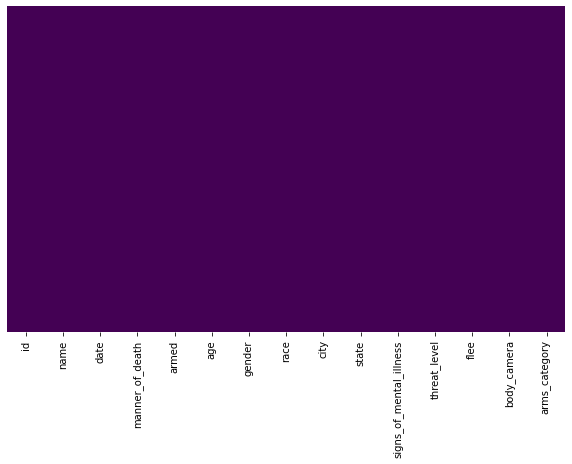

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [7]:
df.loc[df['age'].idxmax()]

id                                    2407
name                       Frank W. Wratny
date                            2017-03-08
manner_of_death                       shot
armed                                  gun
age                                     91
gender                                   M
race                                 White
city                        Union Township
state                                   PA
signs_of_mental_illness              False
threat_level                        attack
flee                           Not fleeing
body_camera                          False
arms_category                         Guns
Name: 2071, dtype: object

In [8]:
#https://www.post-gazette.com/local/north/2017/03/09/Elderly-man-91-fatally-shot-by-police-in-Lawrence-County-standoff/stories/201703090153

In [9]:
df.loc[df['age'].idxmin()]

id                                   980
name                       Jeremy Mardis
date                          2015-11-03
manner_of_death                     shot
armed                            unarmed
age                                    6
gender                                 M
race                               White
city                          Marksville
state                                 LA
signs_of_mental_illness            False
threat_level                       other
flee                                 Car
body_camera                         True
arms_category                    Unarmed
Name: 811, dtype: object

In [10]:
#https://en.wikipedia.org/wiki/Shooting_of_Jeremy_Mardis

In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
dados = df['body_camera']

In [14]:
labelencoder = LabelEncoder()

In [15]:
bc = labelencoder.fit_transform(dados)

In [16]:
bc

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
mental = df['signs_of_mental_illness']

In [18]:
smi = labelencoder.fit_transform(mental)

In [19]:
smi

array([1, 0, 0, ..., 0, 0, 0])

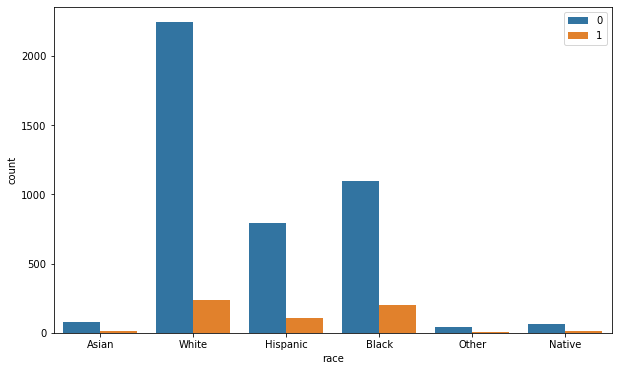

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['race'],data=df,hue=bc)

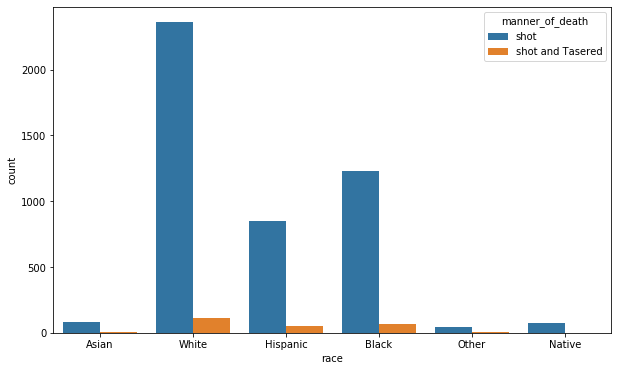

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['race'],data=df,hue='manner_of_death')

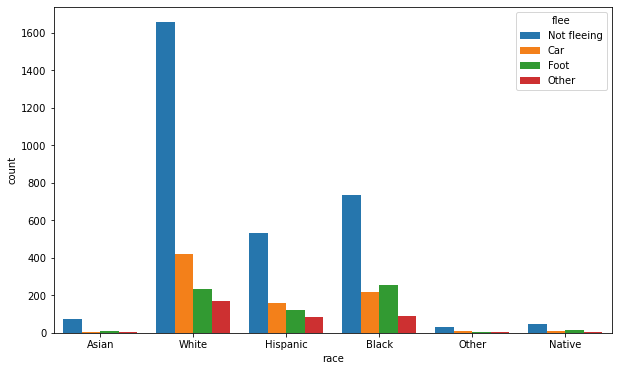

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['race'],data=df,hue='flee',saturation=0.9)

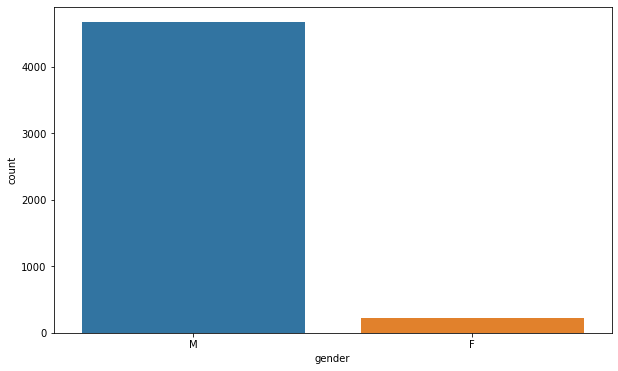

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['gender'],data=df)

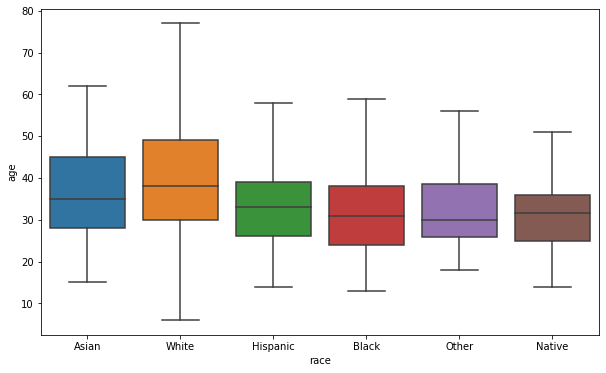

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='race',y='age',data=df,showfliers=False)

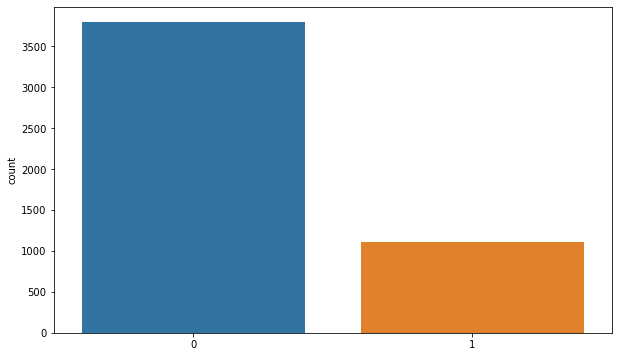

In [24]:
#Pessoas com sinais de doença mental
plt.figure(figsize=(10,6))
sns.countplot(x=smi, data=df)

In [25]:
df[(df['race']=='Black')]['state'].value_counts().head(5)

CA    122
FL    111
TX     99
GA     71
LA     60
Name: state, dtype: int64

In [26]:
df[(df['race']=='White')]['state'].value_counts().head(5)

CA    221
TX    175
FL    156
AZ    109
OK    100
Name: state, dtype: int64

In [27]:
df[(df['race']=='Asian')]['state'].value_counts().head(5)

CA    29
WA     9
HI     9
TX     6
CO     5
Name: state, dtype: int64

In [28]:
df[(df['race']=='Hispanic')]['state'].value_counts().head(5)

CA    316
TX    142
AZ     83
NM     64
FL     51
Name: state, dtype: int64

In [29]:
df[(df['race']=='Native')]['state'].value_counts().head(5)

AZ    13
AK     9
OK     7
WA     7
ND     5
Name: state, dtype: int64

In [36]:
#qual estado matou mais mulheres

In [30]:
df[(df['gender']=='F')]['state'].value_counts().head(5)

CA    37
TX    26
FL    17
AZ    16
GA    11
Name: state, dtype: int64

In [38]:
#Qual estado matou mais homens

In [31]:
df[(df['gender']=='M')]['state'].value_counts().head(5)

CA    664
TX    400
FL    307
AZ    206
CO    165
Name: state, dtype: int64

In [32]:
df[df['state']=='CA']['city'].value_counts().head()

Los Angeles    78
Bakersfield    22
Fresno         18
Long Beach     17
San Diego      15
Name: city, dtype: int64

In [33]:
#Quantas crianças morreram
df[df['age']<12].count().max()

2

In [34]:
#Quantos adolescentes morreram
df[(df['age']>12)&(df['age']<18)].count().max()

94

In [35]:
#Quantos adultos morreram
df[df['age']>=18].count().max()

4798

In [36]:
df['date'] = pd.to_datetime(df['date'])

In [37]:
time = df['date'].iloc[0]

In [38]:
df['year'] = df['date'].apply(lambda time: time.year)

In [39]:
df['month'] = df['date'].apply(lambda time: time.month)

In [40]:
df['day_of_week'] = df['date'].apply(lambda time: time.dayofweek)

In [41]:
mes = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
      10:'October',11:'November',12:'December'}

In [42]:
df['month'] = df['month'].map(mes)

In [43]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,day_of_week
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,January,4
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,January,4
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,January,5
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,January,6
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,January,6


In [44]:
df.drop('date',inplace=True,axis=1)

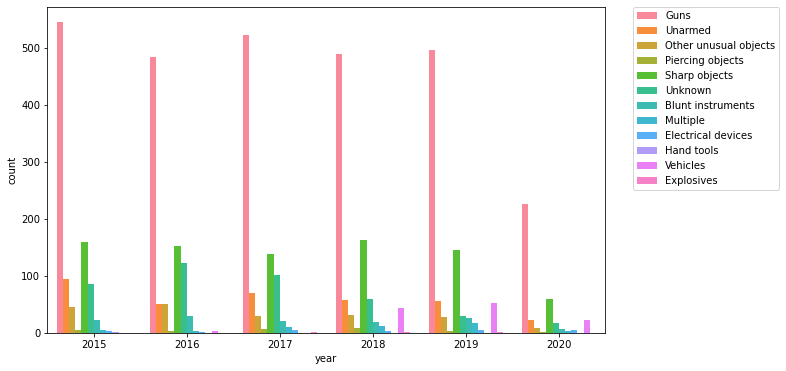

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['year'],data = df,hue='arms_category',saturation=2.0)
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

In [46]:
pt = df.pivot_table(index='month',columns='year',values='age')

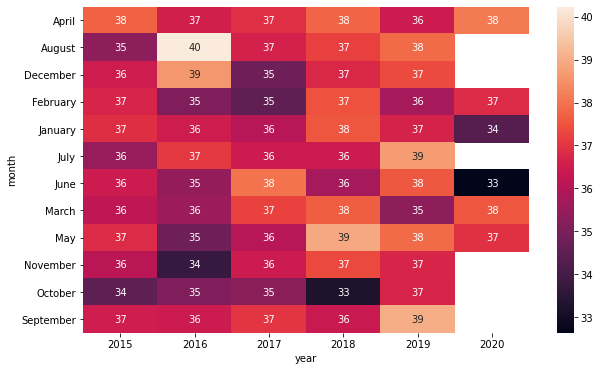

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(pt,annot=True)